In [7]:
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
df_csv = pd.read_csv('cleanDatasets/master_dataset.csv')
df = pd.DataFrame(df_csv)
print("Number of records: " + str(len(df)))
df.columns.values
# df.lic_code.unique()

Number of records: 2232


array(['business_name', 'category', 'lic_code', 'street_address',
       'business_start_date', 'business_end_date', 'Lifespan', 'isClosed',
       'full_address', 'business_id', 'name', 'district', 'MA', 'year',
       'latitude', 'longitude', 'tract', 'GEOID10', 'link', 'HC01_VC05',
       'HC01_VC113', 'HC01_VC115', 'HC01_VC117', 'HC01_VC121',
       'HC01_VC28', 'HC01_VC36', 'HC01_VC41', 'HC01_VC42', 'HC01_VC43',
       'HC01_VC44', 'HC01_VC50', 'HC01_VC51', 'HC01_VC52', 'HC01_VC53',
       'HC01_VC54', 'HC01_VC55', 'HC01_VC56', 'HC01_VC57', 'HC01_VC58',
       'HC01_VC59', 'HC01_VC60', 'HC01_VC61', 'HC01_VC62', 'HC01_VC67',
       'HC01_VC68', 'HC01_VC69', 'HC01_VC85', 'HC01_VC86', 'HC01_VC89',
       'HC01_VC99', 'HC03_VC05', 'HC03_VC13', 'HC03_VC156', 'HC03_VC28',
       'HC03_VC41', 'HC03_VC42', 'HC03_VC43', 'HC03_VC44', 'HC03_VC45',
       'HC03_VC50', 'HC03_VC51', 'HC03_VC52', 'HC03_VC53', 'HC03_VC54',
       'HC03_VC55', 'HC03_VC56', 'HC03_VC57', 'HC03_VC58', 'HC03_VC59',
  

In [9]:
# Filter

df = df[df['Opening_year'] >= 2010] # Only restaurants opened after 2010.
len(df)

1219

In [10]:
print('-------------------Filter Data Summary---------------------')
print('**********************************************************************')
print('--------------------Number of Openings, 2010-2018---------------------')
print(df.groupby('Opening_year').size())
print('--------------------Number of Closures, 2010-2018---------------------')
print(df.groupby('Closing_year').size())
print('----------------Count of restaurants openings, by districts--------------------')
df_openLocations = df[df['isClosed'] == "no"]
print(pd.value_counts(df_openLocations['district'].values, sort=True))
print('----------------Count of restaurants closures, by districts--------------------')
df_closedLocations = df[df['isClosed'] == "yes"]
print(pd.value_counts(df_closedLocations['district'].values, sort=True))
print('----------------------------------------------------------------------')
print('Restaurants "Chains", i.e. with multiple locations. NOT DUPLICATES')
df['lic_code'] = df['lic_code'].groupby(df['business_name']).ffill() # Assigns LIC_Code to matching locations (ex: there might be 3 restaurants with the same name, a chain in these cases, and only one of those will have a LIC.)
print(df.groupby('business_name').filter(lambda x: len(x) > 2).sort_values(by ='business_name',ascending=False))
print('--------------------Count of restaurants, by type---------------------')
print(pd.value_counts(df['lic_code'].values, sort=True))

-------------------Filter Data Summary---------------------
**********************************************************************
--------------------Number of Openings, 2010-2018---------------------
Opening_year
2010     91
2011    116
2012    143
2013    169
2014    161
2015    168
2016    160
2017    135
2018     76
dtype: int64
--------------------Number of Closures, 2010-2018---------------------
Closing_year
2014.0     1
2015.0    11
2016.0    27
2017.0    52
2018.0    15
dtype: int64
----------------Count of restaurants openings, by districts--------------------
Mission                    90
South of Market            86
Financial District         78
Inner Richmond             59
Chinatown                  53
Tenderloin                 48
Outer Richmond             39
Outer Sunset               37
Lower Nob Hill             33
North Beach                31
Downtown / Union Square    26
Polk Gulch                 26
Mission Dolores            26
Civic Center               22
Ca

In [11]:
# df = df.dropna(subset=['lic_code']) # Remove NaN values in 'lic_code'
# len(df)

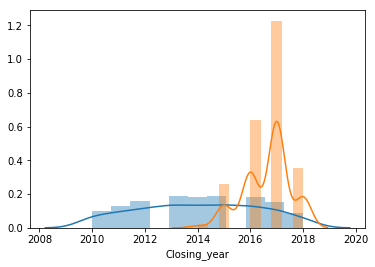

In [12]:
# https://seaborn.pydata.org/tutorial/categorical.html
Cmonths = df["Closing_month"].dropna()
Cyears = df["Closing_year"].dropna()
sns.distplot(df["Opening_year"])
sns.distplot(Cyears)

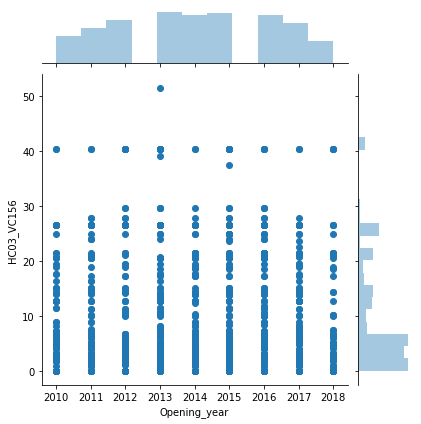

In [40]:
sns.jointplot(x='Opening_year', y='HC03_VC156', data = df);

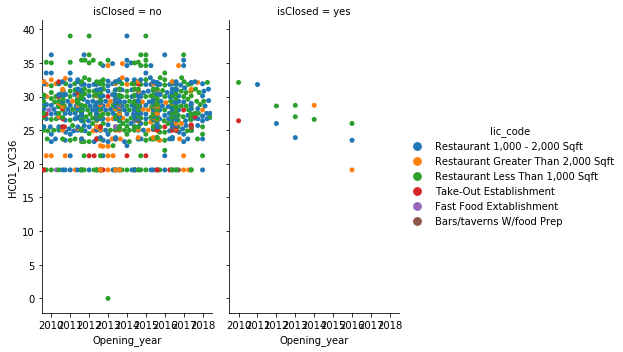

In [35]:
sns.catplot(x="Opening_year", y="HC01_VC36", hue="lic_code",
            col="isClosed", aspect=.6,
            kind="swarm", data=df);

# HC01_VC36 is mean travel time for workers (census tract level) in minutes

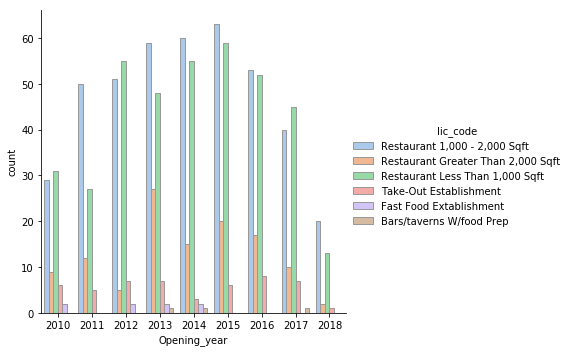

In [41]:
sns.catplot(x="Opening_year", hue="lic_code", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

In [ ]:
# seaborn.pairplot(df, vars= ['Lifespan', 'HC01_VC115', 'MA',
#                             'HC01_VC113', 'HC01_VC115', 'HC01_VC117', 'HC01_VC121',
#                            'HC01_VC28', 'HC01_VC36', 'HC01_VC41', 'HC01_VC42', 'HC01_VC43',
#                            'HC01_VC44', 'HC01_VC50', 'HC01_VC51', 'HC01_VC52', 'HC01_VC53',
#                            'HC01_VC54', 'HC01_VC55', 'HC01_VC56', 'HC01_VC57', 'HC01_VC58',
#                            'HC01_VC59', 'HC01_VC60', 'HC01_VC61', 'HC01_VC62', 'HC01_VC67',
#                            'HC01_VC68', 'HC01_VC69', 'HC01_VC85', 'HC01_VC86', 'HC01_VC89',
#                            'HC01_VC99', 'HC03_VC05', 'HC03_VC13', 'HC03_VC156', 'HC03_VC28',
#                            'HC03_VC41', 'HC03_VC42', 'HC03_VC43', 'HC03_VC44', 'HC03_VC45',
#                            'HC03_VC50', 'HC03_VC51', 'HC03_VC52', 'HC03_VC53', 'HC03_VC54',
#                            'HC03_VC55', 'HC03_VC56', 'HC03_VC57', 'HC03_VC58', 'HC03_VC59',
#                            'HC03_VC60', 'HC03_VC61', 'HC03_VC62', 'HC03_VC67', 'HC03_VC68',
#                            'HC03_VC69', 'HC03_VC75', 'HC03_VC76', 'HC03_VC77', 'HC03_VC78',
#                            'HC03_VC79', 'HC03_VC80', 'HC03_VC81', 'HC03_VC82', 'HC03_VC83',
#                            'HC03_VC84', 'HD01_S001', 'HD01_S020', 'HD01_S026', 'HD01_S045',
#                            'HD01_S051', 'HD01_S070', 'HD01_S151', 'HD01_S169', 'HD01_S170',
#                            'HD01_S171', 'HD01_S180', 'HD01_S181', 'HD01_S184', 'HD02_S026',
#                            'HD02_S051', 'HD02_S151', 'HD02_S170', 'HD02_S171', 'HD02_S180',
#                            'HD02_S181', 'HD02_S184'],
#                  kind='reg') 

In [ ]:
####################################### Regression Testing ########################################################33

In [ ]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import geopandas as gpd

sns.set(style="whitegrid")

In [ ]:
https://www.scipy-lectures.org/packages/statistics/auto_examples/plot_wage_education_gender.html
http://andrewgaidus.com/Spatial_Econonometric_Modeling/
http://darribas.org/gds_scipy16/ipynb_md/08_spatial_regression.html
http://people.duke.edu/~rnau/testing.htm
https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9